In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the train dataset into notebook
train_df = pd.read_csv('train.csv')

In [8]:
# view the train dataset first five records
pd.set_option('display.max_rows', None)  # Show all rows

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# view the shape of the dataset
train_df.shape

(1460, 81)

In [4]:
# view the list of columns in the dataset

for i in train_df.columns:
    print(i)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [46]:
# To compare and find the missing columns in train vs test datasets:

test_df=pd.read_csv('test.csv')

missing_columns = list(set(train_df.columns) - set(test_df.columns))

print("Missing Columns in Test Dataset: ", missing_columns)

Missing Columns in Test Dataset:  ['SalePrice']


In [42]:
# Calculate the percentage of missing values in each column
missing_percent = (train_df.isnull().mean() * 100).reset_index()
missing_percent.columns = ['Column', 'Missing Percentage']

# Define a threshold for coloring (e.g., 49%)
threshold = 49

# Define a function to apply the style
def color_exceeding_threshold(val):
    if val > threshold:
        return f'background-color: red'
    else:
        return f'background-color: lightgreen'

# Apply the style to the DataFrame
styled_df = missing_percent.style.applymap(color_exceeding_threshold, subset=['Missing Percentage'])
# Display the styled DataFrame
styled_df


,Column,Missing Percentage
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.000000
3,LotFrontage,17.739726
4,LotArea,0.000000
5,Street,0.000000
6,Alley,93.767123
7,LotShape,0.000000
8,LandContour,0.000000
9,Utilities,0.000000


In [47]:
# To view the no of missing values for each column alomg with its dtypes

pd.set_option('display.max_rows', None)  # Show all rows

a=train_df.isnull().mean()*100
b=train_df.dtypes

# Create a new DataFrame to combine the information
summary_df = pd.DataFrame({'Null %': a, 'Data Types': b})

print(summary_df)

                  Null % Data Types
Id              0.000000      int64
MSSubClass      0.000000      int64
MSZoning        0.000000     object
LotFrontage    17.739726    float64
LotArea         0.000000      int64
Street          0.000000     object
Alley          93.767123     object
LotShape        0.000000     object
LandContour     0.000000     object
Utilities       0.000000     object
LotConfig       0.000000     object
LandSlope       0.000000     object
Neighborhood    0.000000     object
Condition1      0.000000     object
Condition2      0.000000     object
BldgType        0.000000     object
HouseStyle      0.000000     object
OverallQual     0.000000      int64
OverallCond     0.000000      int64
YearBuilt       0.000000      int64
YearRemodAdd    0.000000      int64
RoofStyle       0.000000     object
RoofMatl        0.000000     object
Exterior1st     0.000000     object
Exterior2nd     0.000000     object
MasVnrType      0.547945     object
MasVnrArea      0.547945    

In [52]:
# filtering the non null value columns

sd1=summary_df[summary_df['Null %']!=0]
sd1

,Null %,Data Types
LotFrontage,17.739726,float64
Alley,93.767123,object
MasVnrType,0.547945,object
MasVnrArea,0.547945,float64
BsmtQual,2.534247,object
BsmtCond,2.534247,object
BsmtExposure,2.602740,object
BsmtFinType1,2.534247,object
BsmtFinType2,2.602740,object
Electrical,0.068493,object


In [57]:
sd1.count()

Null %        19
Data Types    19
dtype: int64

In [58]:
sd1[sd1['Data Types']=='float64']

,Null %,Data Types
LotFrontage,17.739726,float64
MasVnrArea,0.547945,float64
GarageYrBlt,5.547945,float64


In [60]:
# Its a numerical data type column, hence considering its mean value to fill its missing values
columns_to_fill = ['MasVnrArea','GarageYrBlt','LotFrontage']

for column in columns_to_fill:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

In [72]:

sd2=sd1[sd1['Data Types']=='object']
sd2[sd2['Null %']<50]

,Null %,Data Types
MasVnrType,0,object
BsmtQual,2,object
BsmtCond,2,object
BsmtExposure,2,object
BsmtFinType1,2,object
BsmtFinType2,2,object
Electrical,0,object
FireplaceQu,47,object
GarageType,5,object
GarageFinish,5,object


In [74]:
# For the columns with missing values <50% and categorical dtype columns
# we are considering the mode value of its columns, to fill its missing places

columns_to_fill = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical',
                   'FireplaceQu',   'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Fill the specified columns with their respective modes
for column in columns_to_fill:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)


In [75]:
sd2[sd2['Null %']>50]

,Null %,Data Types
Alley,93,object
PoolQC,99,object
Fence,80,object
MiscFeature,96,object


In [76]:
# For the columns with missing values >50% are going to drop

columns_to_drop = ['PoolQC','Fence','MiscFeature','Alley']

train_df.drop(columns=columns_to_drop,axis=1, inplace=True)


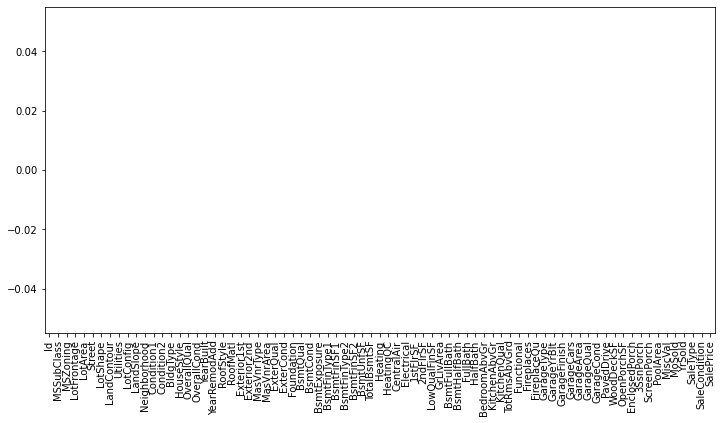

In [77]:
missing_counts = train_df.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

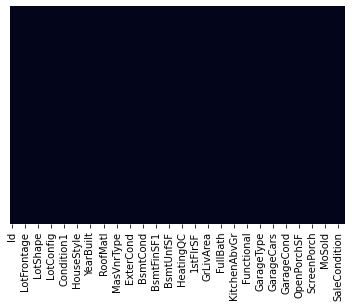

In [79]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [89]:
train_df.drop('Id',axis=1, inplace=True)


In [90]:
train_df.shape

(1460, 76)

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [92]:
train_df['FireplaceQu'].value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [177]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Handle Categorical Features

In [233]:
df = pd.DataFrame(train_df)
categorical_features = df.select_dtypes(include=['object']).columns

In [234]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [235]:
def category_onehot_multcols(multicolumns):
    df_final=final_df
    i=0
    for fields in multicolumns:
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final,df1], axis=1)
        i=i+1
        df_final = pd.concat([final_df,df_final],axis=1)
    return df_final


In [236]:
main_df = df.copy()

In [237]:
# Combine test data
test_df = pd.read_csv('formulatedtest.csv')

In [238]:
test_df.shape

(1459, 74)

In [239]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [240]:
final_df = pd.concat([df,test_df],axis=0)

In [241]:
final_df.shape

(2919, 76)

In [242]:
final_df=category_onehot_multcols(categorical_features)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [243]:
final_df.shape

(2919, 2384)

In [244]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [245]:
final_df.shape

(2919, 215)

In [246]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,FireplaceQu,Functional,KitchenQual,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,Fa,Gd,TA,Po,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,Normal,WD,Y,TA,TA,RFn,Attchd,Gd,Typ,Gd,SBrkr,Y,Ex,GasA,Unf,GLQ,No,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,Reg,Pave,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,Normal,WD,Y,TA,TA,RFn,Attchd,TA,Typ,TA,SBrkr,Y,Ex,GasA,Unf,ALQ,Gd,TA,Gd,CBlock,TA,TA,None,MetalSd,MetalSd,CompShg,Gable,1Story,1Fam,Norm,Feedr,Veenker,Gtl,FR2,AllPub,Lvl,Reg,Pave,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,Normal,WD,Y,TA,TA,RFn,Attchd,TA,Typ,Gd,SBrkr,Y,Ex,GasA,Unf,GLQ,Mn,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,IR1,Pave,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,Abnorml,WD,Y,TA,TA,Unf,Detchd,Gd,Typ,Gd,SBrkr,Y,Gd,GasA,Unf,ALQ,No,Gd,TA,BrkTil,TA,TA,None,Wd Shng,Wd Sdng,CompShg,Gable,2Story,1Fam,Norm,Norm,Crawfor,Gtl,Corner,AllPub,Lvl,IR1,Pave,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [247]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [248]:
pd.set_option('display.max_columns', None)  # Show all rows
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,FireplaceQu,Functional,KitchenQual,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,Fa,Gd,TA,Po,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,Normal,WD,Y,TA,TA,RFn,Attchd,Gd,Typ,Gd,SBrkr,Y,Ex,GasA,Unf,GLQ,No,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,Reg,Pave,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,Normal,WD,Y,TA,TA,RFn,Attchd,TA,Typ,TA,SBrkr,Y,Ex,GasA,Unf,ALQ,Gd,TA,Gd,CBlock,TA,TA,None,MetalSd,MetalSd,CompShg,Gable,1Story,1Fam,Norm,Feedr,Veenker,Gtl,FR2,AllPub,Lvl,Reg,Pave,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,Normal,WD,Y,TA,TA,RFn,Attchd,TA,Typ,Gd,SBrkr,Y,Ex,GasA,Unf,GLQ,Mn,TA,Gd,PConc,TA,Gd,BrkFace,VinylSd,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Norm,CollgCr,Gtl,Inside,AllPub,Lvl,IR1,Pave,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,Abnorml,WD,Y,TA,TA,Unf,Detchd,Gd,Typ,Gd,SBrkr,Y,Gd,GasA,Unf,ALQ,No,Gd,TA,BrkTil,TA,TA,None,Wd Shng,Wd Sdng,CompShg,Gable,2Story,1Fam,Norm,Norm,Crawfor,Gtl,Corner,AllPub,Lvl,IR1,Pave,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [249]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleCondition,SaleType,PavedDrive,GarageCond,GarageQual,GarageFinish,GarageType,FireplaceQu,Functional,KitchenQual,Electrical,CentralAir,HeatingQC,Heating,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,Fa,Gd,TA,Po,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,NaN,Normal,WD,Y,TA,TA,Unf,Attchd,NaN,Typ,TA,SBrkr,Y,TA,GasA,LwQ,Rec,No,TA,TA,CBlock,TA,TA,None,VinylSd,VinylSd,CompShg,Gable,1Story,1Fam,Norm,Feedr,NAmes,Gtl,Inside,AllPub,Lvl,Reg,Pave,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,NaN,Normal,WD,Y,TA,TA,Unf,Attchd,NaN,Typ,Gd,SBrkr,Y,TA,GasA,Unf,ALQ,No,TA,TA,CBlock,TA,TA,BrkFace,Wd Sdng,Wd Sdng,CompShg,Hip,1Story,1Fam,Norm,Norm,NAmes,Gtl,Corner,AllPub,Lvl,IR1,Pave,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,NaN,Normal,WD,Y,TA,TA,Fin,Attchd,NaN,Typ,TA,SBrkr,Y,Gd,GasA,Unf,GLQ,No,TA,Gd,PConc,TA,TA,None,VinylSd,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Norm,Gilbert,Gtl,Inside,AllPub,Lvl,IR1,Pave,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,NaN,Normal,WD,Y,TA,TA,Fin,Attchd,NaN,Typ,Gd,SBrkr,Y,Ex,GasA,Unf,GLQ,No,TA,TA,PConc,TA,TA,BrkFace,VinylSd,VinylSd,CompShg,Gable,2Story,1Fam,Norm,Norm,Gilbert,Gtl,Inside,AllPub,Lvl,IR1,Pave,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,

In [250]:
'SalePrice' in df_Test

True

In [251]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\RAMMAN INFOTECH\AppData\Local\Temp\ipykernel_2368\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [252]:
df_Test.shape

(1459, 214)

In [253]:
x_train = df_Train.drop(['SalePrice'],axis=1)
y_train = df_Train['SalePrice']

In [254]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [260]:
 import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtrain.enable_categorical()


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:SaleCondition: object, SaleType: object, PavedDrive: object, GarageCond: object, GarageQual: object, GarageFinish: object, GarageType: object, FireplaceQu: object, Functional: object, KitchenQual: object, Electrical: object, CentralAir: object, HeatingQC: object, Heating: object, BsmtFinType2: object, BsmtFinType1: object, BsmtExposure: object, BsmtCond: object, BsmtQual: object, Foundation: object, ExterCond: object, ExterQual: object, MasVnrType: object, Exterior2nd: object, Exterior1st: object, RoofMatl: object, RoofStyle: object, HouseStyle: object, BldgType: object, Condition2: object, Condition1: object, Neighborhood: object, LandSlope: object, LotConfig: object, Utilities: object, LandContour: object, LotShape: object, Street: object

In [256]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:SaleCondition: object, SaleType: object, PavedDrive: object, GarageCond: object, GarageQual: object, GarageFinish: object, GarageType: object, FireplaceQu: object, Functional: object, KitchenQual: object, Electrical: object, CentralAir: object, HeatingQC: object, Heating: object, BsmtFinType2: object, BsmtFinType1: object, BsmtExposure: object, BsmtCond: object, BsmtQual: object, Foundation: object, ExterCond: object, ExterQual: object, MasVnrType: object, Exterior2nd: object, Exterior1st: object, RoofMatl: object, RoofStyle: object, HouseStyle: object, BldgType: object, Condition2: object, Condition1: object, Neighborhood: object, LandSlope: object, LotConfig: object, Utilities: object, LandContour: object, LotShape: object, Street: object